In [1]:
import numpy as np
import torch

from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

from hausdorff_metric import HausdorffDistance
from hausdorff_loss import HausdorffDTLoss, HausdorffERLoss
from utils import plot, pad_with, summary

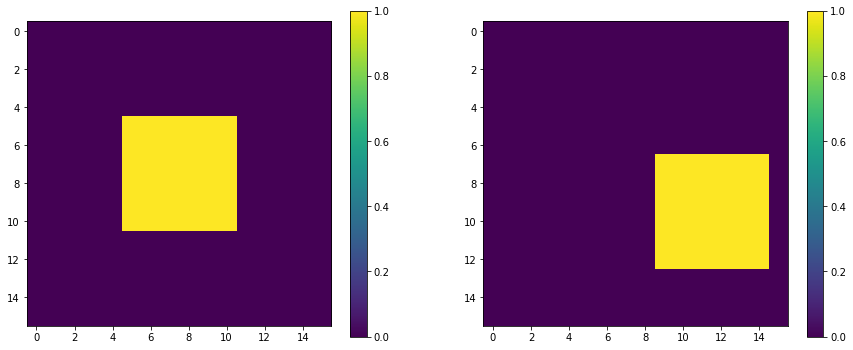

In [2]:
# preparing dummy test data
x = np.ones((6, 6))
x = np.pad(x, 5, pad_with)
y = np.roll(np.roll(x, 2, axis=0), 4, axis=1)

plot(x, y)

In [3]:
HD = HausdorffDistance()
HD_dt = HausdorffDTLoss()
HD_er = HausdorffERLoss(erosions=4)

In [4]:
x = torch.from_numpy(np.array([[x]])).float()
y = torch.from_numpy(np.array([[y]])).float()

Loss:  2.3203125


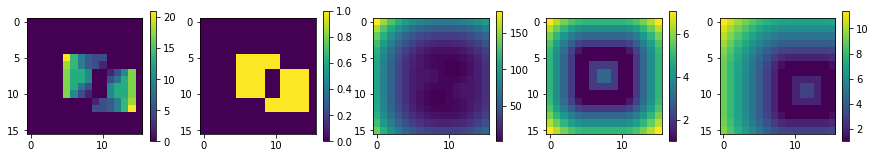

1) PredError * FieldSum (output) 2) PredError 3) FieldSum (/w alpha) 4) FieldX 5) FieldY


In [5]:
# visualize distance transform loss
loss, fields = HD_dt.forward(x, y, debug=True)

print("Loss: ", loss)
plot(*fields)
print("1) PredError * FieldSum (output) 2) PredError 3) FieldSum (/w alpha) 4) FieldX 5) FieldY")

Loss:  0.927732


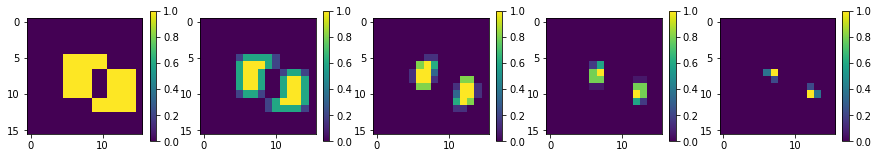

In [6]:
# visualize erosion loss
loss, erosions = HD_er.forward(x, y, debug=True)

print("Loss: ", loss)
plot(*erosions)

In [7]:
# collect data
X = np.ones((100,100))
X = np.pad(X, 200, pad_with)

HD_dts = []
HD_ers = []
HDs = []

HD_er.erosions = 10

for i in range(100):
    Y = np.roll(np.roll(X, -50 + i, axis=0), -50 + i, axis=1)
    
    x_tensor = torch.from_numpy(np.array([[X]])).float()
    y_tensor = torch.from_numpy(np.array([[Y]])).float()
    
    HD_dts.append(HD_dt.forward(x_tensor, y_tensor).item())
    HD_ers.append(HD_er.forward(x_tensor, y_tensor).item())
    HDs.append(HD.compute(x_tensor, y_tensor).item())

In [8]:
print("i) DT, ER, HD")
summary(HD_dts, HD_ers, HDs)

i) DT, ER, HD
1) 94.70020294189453, 17.459333419799805, 70.71067810058594 
2) 89.99340057373047, 17.14825439453125, 69.29646301269531 
3) 85.4089584350586, 16.83101463317871, 67.88224792480469 
4) 80.94828796386719, 16.507612228393555, 66.4680404663086 
5) 76.61263275146484, 16.178056716918945, 65.05382537841797 
6) 72.40308380126953, 15.842333793640137, 63.639610290527344 
7) 68.320556640625, 15.50045394897461, 62.22539520263672 
8) 64.36583709716797, 15.152414321899414, 60.81118392944336 
9) 60.539527893066406, 14.798215866088867, 59.396968841552734 
10) 56.842071533203125, 14.437854766845703, 57.982757568359375 
11) 53.27376174926758, 14.071334838867188, 56.56854248046875 
12) 49.834720611572266, 13.698655128479004, 55.154327392578125 
13) 46.52492141723633, 13.319815635681152, 53.740116119384766 
14) 43.34416961669922, 12.934816360473633, 52.32590103149414 
15) 40.292110443115234, 12.543656349182129, 50.91168975830078 
16) 37.36824035644531, 12.146336555480957, 49.497474670410156 


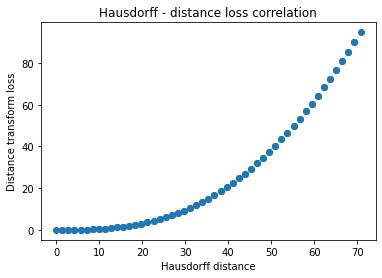

Pearson's coefficient:  0.9350559029362231


In [9]:
# hausdorff distance - distance loss correlation
plt.scatter(HDs, HD_dts)
plt.ylabel("Distance transform loss")
plt.xlabel("Hausdorff distance")
plt.title("Hausdorff - distance loss correlation")
plt.show()

print("Pearson's coefficient: ", pearsonr(HDs, HD_dts)[0])

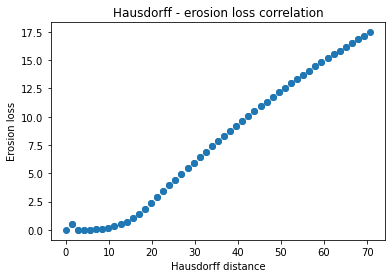

Pearson's coefficient:  0.9931339747998909


In [10]:
# hausdorff distance - erosion loss correlation
plt.scatter(HDs, HD_ers)
plt.ylabel("Erosion loss")
plt.xlabel("Hausdorff distance")
plt.title("Hausdorff - erosion loss correlation")
plt.show()

print("Pearson's coefficient: ", pearsonr(HDs, HD_ers)[0])